# Assignment 
1. Upload your [yourname]dataset.npz to whatsapp group
2. Vary the parameters from splitting data into trainImage and testImage to find the best accuracy
3. Predict and display your prediction 

In [158]:
import tensorflow as tf 
print(tf.__version__)

2.7.0


In [159]:
import numpy as np 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [160]:
datasetFileName = "azureen_dataset.npz"
with np.load(datasetFileName, allow_pickle=True) as data:
    dataImages = data['images']
    dataLabels = data['labels']
    dataLabelNames = data['labelnames']

In [161]:
print(dataImages.shape)
print(dataLabels.shape)
print(dataLabelNames.shape)

(59,)
(59,)
(59,)


In [162]:
print(dataImages.dtype)
print(dataLabels.dtype)
print(dataLabelNames.dtype)

object
int64
<U10


In [163]:
print(dataLabels)
print(dataLabelNames)

[0 1 3 5 6 7 8 0 1 2 3 4 5 6 7 8 0 1 3 4 6 7 1 2 3 6 7 0 1 3 4 6 7 1 2 3 6
 7 8 2 3 6 7 8 0 1 3 4 7 1 3 5 6 8 1 2 3 6 7]
['afiq' 'azureen' 'goke' 'jincheng' 'mahmuda' 'numan' 'saseendran' 'afiq'
 'azureen' 'gavin' 'goke' 'inamul' 'jincheng' 'mahmuda' 'numan'
 'saseendran' 'afiq' 'azureen' 'goke' 'inamul' 'mahmuda' 'numan' 'azureen'
 'gavin' 'goke' 'mahmuda' 'numan' 'afiq' 'azureen' 'goke' 'inamul'
 'mahmuda' 'numan' 'azureen' 'gavin' 'goke' 'mahmuda' 'numan' 'saseendran'
 'gavin' 'goke' 'mahmuda' 'numan' 'saseendran' 'afiq' 'azureen' 'goke'
 'inamul' 'numan' 'azureen' 'goke' 'jincheng' 'mahmuda' 'saseendran'
 'azureen' 'gavin' 'goke' 'mahmuda' 'numan']


In [164]:
classNames = sorted(np.unique(dataLabelNames))
print(classNames)

['afiq', 'azureen', 'gavin', 'goke', 'inamul', 'jincheng', 'mahmuda', 'numan', 'saseendran']


In [165]:
# model expect shape of image to be 300,300

import cv2 as cv 

#desiredShape = (300,300,3)

N = len(dataImages)
shape = (N, 300, 300, 3)
y = np.empty(shape)

for i in range(N):
    y[i] = cv.resize(dataImages[i], [300,300], interpolation=cv.INTER_AREA)


dataImages.dtype, y.dtype, y.shape

dataImages = y

In [166]:
dataImages.dtype

dtype('float64')

In [167]:
dataImages.shape

(59, 300, 300, 3)

In [168]:
len(dataImages)

59

In [170]:
dataImages = np.float32(dataImages)


In [171]:
dataImages.dtype

dtype('float32')

In [172]:
import cv2 as cv 
import matplotlib.pyplot as plt 


shape = (N, 300, 300)
imgGray = np.empty(shape)

for i in range(N):

    # Convert to grayscale 
    imgGray[i] = cv.cvtColor(dataImages[i], cv.COLOR_BGR2GRAY)
    
 

dataImages = imgGray 

 

In [177]:
dataImages.shape

(59, 300, 300)

In [178]:
len(dataImages)

59

In [181]:
dataLabels = dataLabels.astype('uint8')
dataLabels.dtype

dtype('uint8')

In [182]:
# Split the data 
trainImages, testImages, trainLabels, testLabels = train_test_split(dataImages, dataLabels, test_size=0.33, random_state=40)
print(trainImages.shape)
print(testImages.shape)

(39, 300, 300)
(20, 300, 300)


In [183]:
print(testLabels.shape)
print(trainLabels.shape)

(20,)
(39,)


In [184]:
testLabels

array([6, 1, 6, 7, 3, 3, 6, 7, 3, 8, 8, 0, 7, 7, 0, 7, 3, 6, 3, 4],
      dtype=uint8)

In [185]:
inputShape = trainImages[0].shape
outputShape = len(classNames)

inputShape, outputShape

((300, 300), 9)

In [186]:
# Normalize
trainImages = trainImages / 255.0
testImages = testImages / 255.0


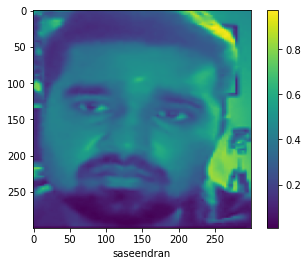

In [187]:
# Visualize train image data 


plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [188]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    # tf.keras.layers.Softmax()
    tf.keras.layers.Dense(outputShape)

])
model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_58 (Flatten)        (None, 90000)             0         
                                                                 
 dense_318 (Dense)           (None, 128)               11520128  
                                                                 
 dense_319 (Dense)           (None, 128)               16512     
                                                                 
 dense_320 (Dense)           (None, 128)               16512     
                                                                 
 dense_321 (Dense)           (None, 128)               16512     
                                                                 
 dense_322 (Dense)           (None, 128)               16512     
                                                                 
 dense_323 (Dense)           (None, 9)               

In [189]:
model.compile(optimizer='adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics = ['accuracy'])

In [190]:
trainLabels

array([8, 6, 2, 2, 6, 3, 7, 6, 2, 3, 1, 2, 5, 1, 5, 1, 4, 1, 7, 8, 4, 1,
       0, 7, 2, 6, 1, 3, 6, 4, 1, 3, 5, 1, 3, 7, 0, 0, 8], dtype=uint8)

In [191]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.99):
            print("\nReached 99% accuracy so cancelling training!")
            self.model.stop_training = True

In [192]:
model.fit(trainImages, trainLabels, epochs=40, callbacks=[myCallback()])

Epoch 1/40
2/2 [==============================] - 0s 24ms/step - loss: 3.0758 - accuracy: 0.0769
Epoch 2/40
2/2 [==============================] - 0s 24ms/step - loss: 11.7227 - accuracy: 0.1026
Epoch 3/40
2/2 [==============================] - 0s 24ms/step - loss: 9.4966 - accuracy: 0.2051
Epoch 4/40
2/2 [==============================] - 0s 24ms/step - loss: 6.3038 - accuracy: 0.1282
Epoch 5/40
2/2 [==============================] - 0s 24ms/step - loss: 4.4188 - accuracy: 0.2308
Epoch 6/40
2/2 [==============================] - 0s 24ms/step - loss: 3.2053 - accuracy: 0.1795
Epoch 7/40
2/2 [==============================] - 0s 24ms/step - loss: 2.2377 - accuracy: 0.1282
Epoch 8/40
2/2 [==============================] - 0s 24ms/step - loss: 1.8508 - accuracy: 0.3846
Epoch 9/40
2/2 [==============================] - 0s 25ms/step - loss: 1.7802 - accuracy: 0.3846
Epoch 10/40
2/2 [==============================] - 0s 24ms/step - loss: 1.5764 - accuracy: 0.5128
Epoch 11/40
2/2 [===========

In [193]:
testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=2)
print('Test Acc:', testAcc)

1/1 - 0s - loss: 0.9881 - accuracy: 0.8000 - 197ms/epoch - 197ms/step
Test Acc: 0.800000011920929


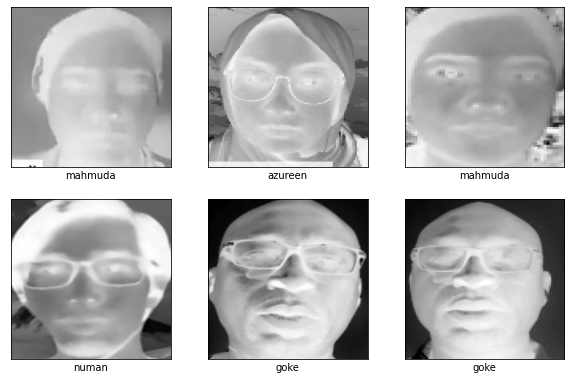

In [194]:
plt.figure(figsize=(10,10))

for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(testImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[testLabels[i]])

plt.show()

### SOftmax

Softmax layers assits in turning the predictions values to fractions. Showing the highest values as the most likely

In [195]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [196]:
predictions = probability_model.predict(testImages)

In [197]:
predictions[0]


array([2.6443601e-03, 5.5924594e-01, 4.3052912e-04, 3.8784847e-02,
       7.8647037e-04, 6.0777483e-04, 3.1401458e-01, 5.9191778e-04,
       8.2893528e-02], dtype=float32)

In [198]:
for v in predictions[0]:

    print(f'{v:.2f}', end=', ')

0.00, 0.56, 0.00, 0.04, 0.00, 0.00, 0.31, 0.00, 0.08, 

In [199]:
np.argmax(predictions[0]), testLabels[0]

(1, 6)

In [200]:
np.sum(predictions[0])

0.99999994

### Saving Model

In [222]:
import os 

exportPath = ""

# if testAcc >0.95:
modelDir = 'tf_model1'
version = f"4_{(testAcc*100):.0f}"

# for SavedModel format 
exportPath = os.path.join(modelDir, version)

# save the model
model.save(exportPath, save_format="tf")

print('\nexport path = {}'.format(exportPath))

!dir {exportPath}

INFO:tensorflow:Assets written to: tf_model1/4_85/assets

export path = tf_model1/4_85
zsh:1: command not found: dir


## Load Model

In [224]:
# load SavedModel format

exportPath = '/Users/azureennaja/Desktop/Perantis/cv-master/azuPrj/json_c/tf_model1/4_85'
newModel = tf.keras.models.load_model(exportPath)

# Check its archi
newModel.summary()

Model: "sequential_212"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_208 (Flatten)       (None, 90000)             0         
                                                                 
 dense_800 (Dense)           (None, 128)               11520128  
                                                                 
 dense_801 (Dense)           (None, 128)               16512     
                                                                 
 dense_802 (Dense)           (None, 128)               16512     
                                                                 
 dense_803 (Dense)           (None, 9)                 1161      
                                                                 
Total params: 11,554,313
Trainable params: 11,554,313
Non-trainable params: 0
_________________________________________________________________


In [225]:
# Evaluate 

loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored Model, Accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)

newPredictions[0]

1/1 - 0s - loss: 0.9646 - accuracy: 0.8500 - 125ms/epoch - 125ms/step
Restored Model, Accuracy: 85.00%
(20, 9)


array([-2.6156898,  2.76593  , -1.1251684, -0.5312337, -4.3810167,
       -2.4256895,  2.0194325,  1.464085 , -0.8101517], dtype=float32)

In [204]:
print("predictions: ", np.argmax(newPredictions[0]))
print("actual:", testLabels[0])

predictions:  1
actual: 6


## Simulations of MOdels

In [218]:
### Simulation for Models 

maxIterations = 15
testAccList = []
thresholdAcc = 0.95
lastTestAcc = 0.0

model = None 
testLoss = 0.0
testAcc = 0.0
modelDir = 'tf_model'
epoch = 30

for iter in range(maxIterations):

    print(f'simulation {iter + 1}', end = '... ')

    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape = inputShape),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(128, activation= 'relu'),
        tf.keras.layers.Dense(outputShape)
    ])
    # model.summary()

    model.compile(optimizer='adam',
                  loss = tf.keras.losses.SparseCategoricalCrossentropy(
                      from_logits = True),
                  metrics = ['accuracy'])
    
    # model training
    model.fit(trainImages, trainLabels, epochs=epoch, verbose=0)

    # model testing
    testLoss, testAcc = model.evaluate(testImages, testLabels, verbose=0)

    # store the accuracy
    testAccList.append(testAcc)

    #print('\nTest Accuracy:', testAcc)
    print(f'test accuracy {testAcc}', end='...')

    exportPath = ""

    # save model if greater than threshold-accuracy 0.95
    if testAcc > thresholdAcc:
        #SavedMdeol formt
        version = f'4_{(testAcc*100):.0f}'

        # for SavedModel format
        exportPath = os.path.join(modelDir, version)

        #save the model
        model.save(exportPath, save_format='tf')
        # print(f'\nexport path = {exportPath}')

        print(f'export path = {exportPath}', end='')


        thresholdAcc = testAcc
        
    print('.')


simulation 1... test accuracy 0.8500000238418579....
simulation 2... test accuracy 0.6499999761581421....
simulation 3... test accuracy 0.699999988079071....
simulation 4... test accuracy 0.75....
simulation 5... test accuracy 0.699999988079071....
simulation 6... test accuracy 0.8500000238418579....
simulation 7... test accuracy 0.8500000238418579....
simulation 8... test accuracy 0.800000011920929....
simulation 9... test accuracy 0.6499999761581421....
simulation 10... test accuracy 0.75....
simulation 11... test accuracy 0.75....
simulation 12... test accuracy 0.800000011920929....
simulation 13... test accuracy 0.6000000238418579....
simulation 14... test accuracy 0.75....
simulation 15... test accuracy 0.8500000238418579....


In [220]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'yellow'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(classNames[predicted_label],
                                100*np.max(predictions_array),
                                classNames[true_label]),
                                color=color)

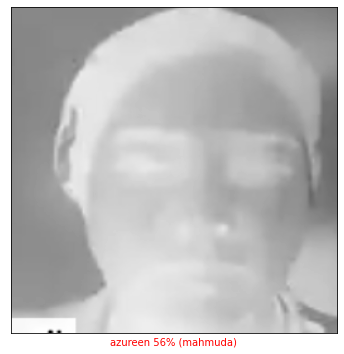

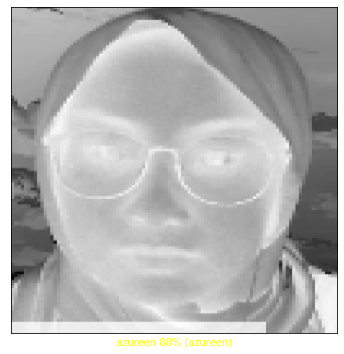

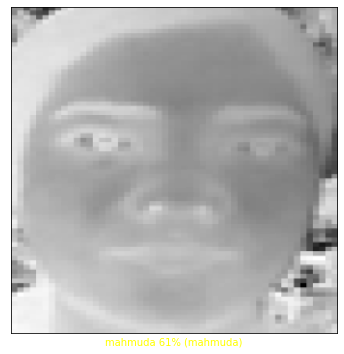

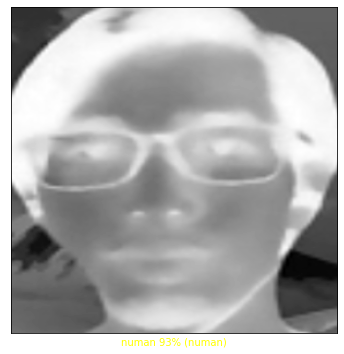

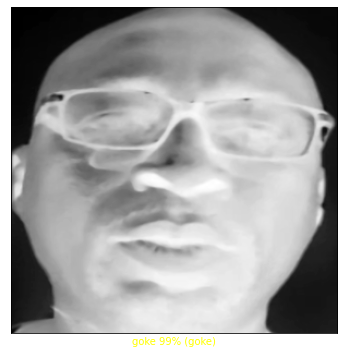

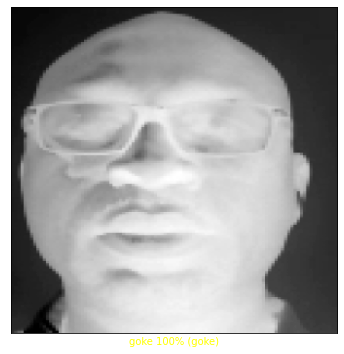

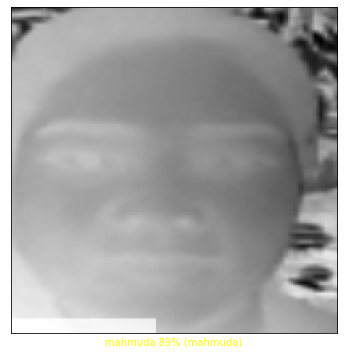

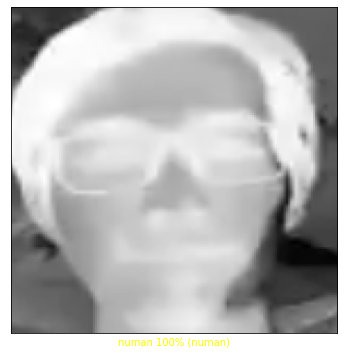

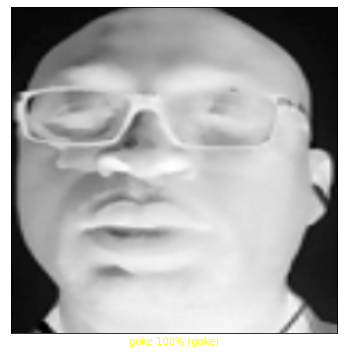

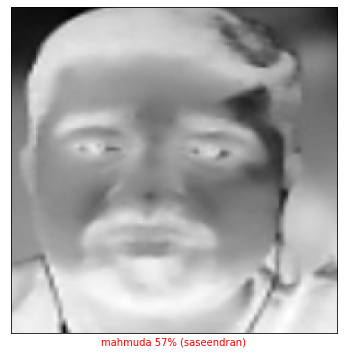

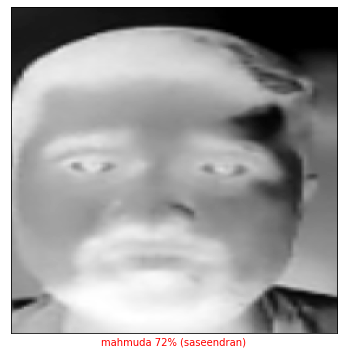

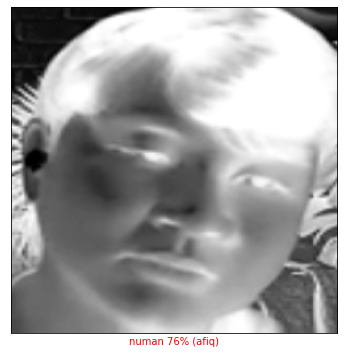

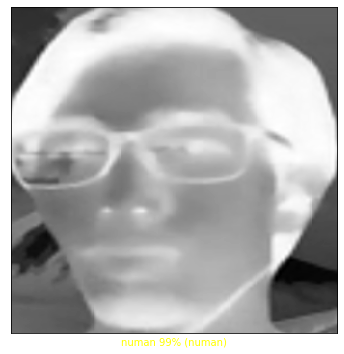

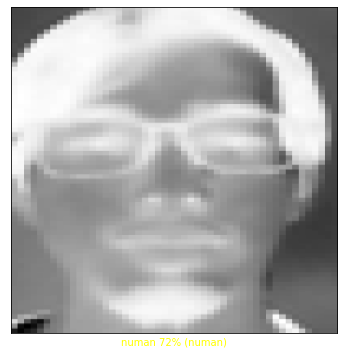

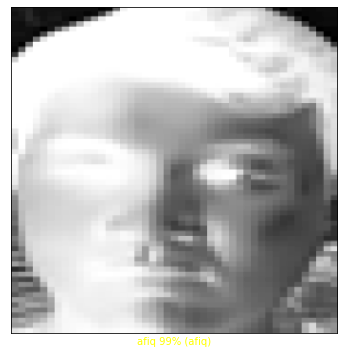

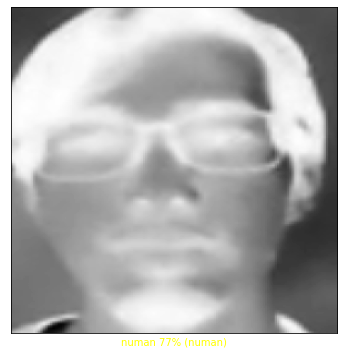

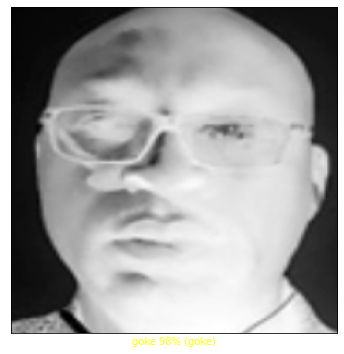

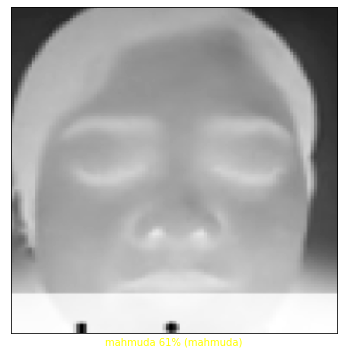

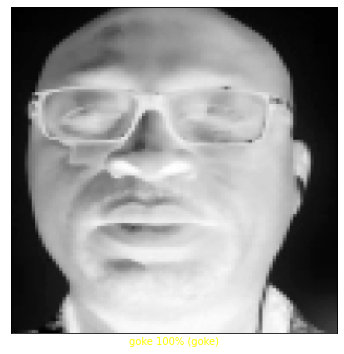

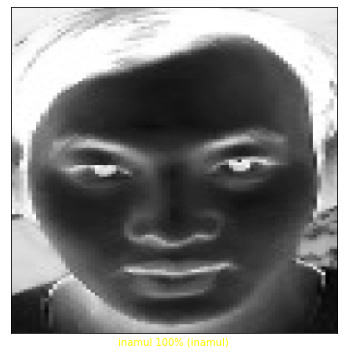

In [221]:
for i in range (len(predictions)):
    plt.figure(figsize=(6,6))
    plot_image(i, predictions[i], testLabels, testImages)


plt.show()